In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv(r"C:\Users\akash\Downloads\raw_data.csv")
df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048296,5.442417711,4.34185547,16.514381,7.549490737
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528148,5.442417711,4.34185547,16.514381,7.549490737
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999495876,5.442417711,4.34185547,16.514381,7.549490737
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853147,5.442417711,4.34185547,16.514381,7.549490737


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [87]:
df.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],inplace=True)

In [88]:
df.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [89]:
df['total_cases']=df['total_cases'].fillna(0)
df['total_deaths']=df['total_deaths'].fillna(0)
df['stringency_index']=df['stringency_index'].fillna(df['stringency_index'].median())
df['gdp_per_capita']=df['gdp_per_capita'].fillna(df['gdp_per_capita'].median())
df['human_development_index']=df['human_development_index'].fillna(df['human_development_index'].median())

In [90]:
df['location'].value_counts()

location
Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: count, Length: 210, dtype: int64

In [91]:
loc=df.groupby('location')['total_cases'].agg(['sum','max','min'])
loc.sort_values(by='sum',ascending = False)

,sum,max,min
location,,,
United States,746014098.0,8154595.0,0.0
Brazil,425704517.0,5235344.0,0.0
India,407771615.0,7550273.0,0.0
Russia,132888951.0,1399334.0,0.0
Peru,74882695.0,868675.0,0.0
...,...,...,...
Vatican,2415.0,26.0,0.0
Montserrat,2383.0,13.0,0.0
Anguilla,614.0,3.0,2.0


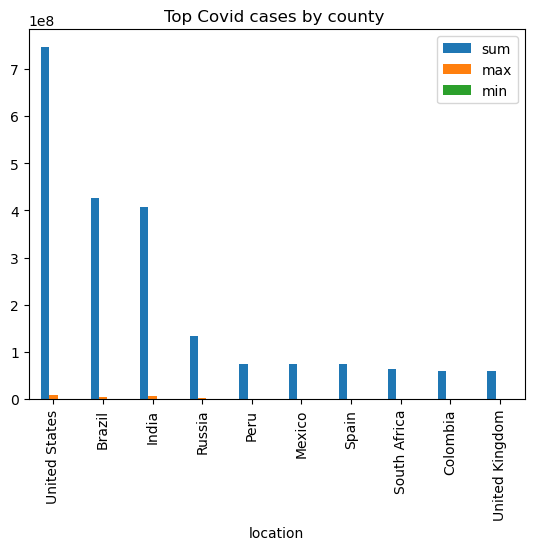

In [99]:
loc.sort_values(by='sum',ascending = False).head(10).plot.bar()
plt.title('Top Covid cases by county ')
plt.show()

- United States reported most number of covid 19  cases with 746014098 cases.
- Brazil and India are in second and third place of most covid 19 cases.

In [93]:
loc.sort_values(by='sum',ascending = True)

,sum,max,min
location,,,
Hong Kong,0.0,0.0,0.0
Solomon Islands,11.0,3.0,2.0
Anguilla,614.0,3.0,2.0
Montserrat,2383.0,13.0,0.0
Vatican,2415.0,26.0,0.0
...,...,...,...
Peru,74882695.0,868675.0,0.0
Russia,132888951.0,1399334.0,0.0
India,407771615.0,7550273.0,0.0


- Hong Kong is the only county not yet report any covid 19 cases.
- Solomon Islands report less number of covid cases, they only reports 11 covid cases.

In [94]:
df[df['total_cases']==df['total_cases'].max()]

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
48414,USA,United States,2020-10-19,8154595.0,219674.0,61.11,331002647,54225.446,0.924


- USA reports most number of covid 19 case on 2020-10-19 (8154595 cases)

In [95]:
death=df.groupby('location')['total_deaths'].agg(['sum','max','min'])
death.sort_values(by='sum',ascending = False)

,sum,max,min
location,,,
United States,26477574.0,219674.0,0.0
Brazil,14340567.0,153905.0,0.0
Mexico,7295850.0,86167.0,0.0
United Kingdom,7249573.0,43646.0,0.0
India,7247327.0,114610.0,0.0
...,...,...,...
Saint Kitts and Nevis,0.0,0.0,0.0
Saint Lucia,0.0,0.0,0.0
Saint Vincent and the Grenadines,0.0,0.0,0.0


In [96]:
df[df['total_deaths']==df['total_deaths'].max()]

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
48414,USA,United States,2020-10-19,8154595.0,219674.0,61.11,331002647,54225.446,0.924


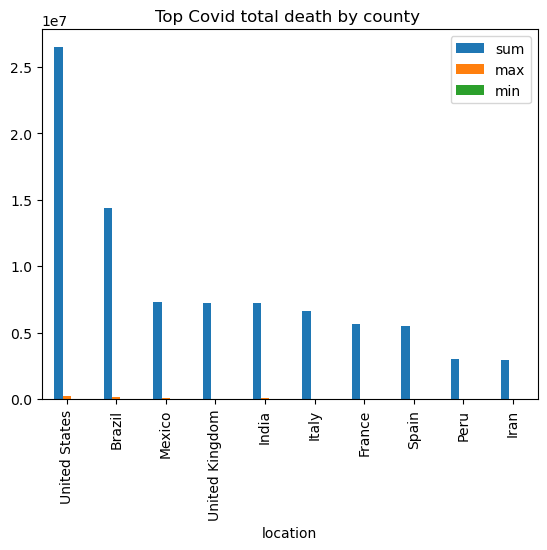

In [100]:
death.sort_values(by='sum',ascending = False).head(10).plot.bar()
plt.title('Top Covid total death by county ')
plt.show()

- USA reports most number of death due to covid19, 26477574 deaths yet.
- 219674 was the World's most covid19 death in a day on 2020-10-19 in USA.
- Brazil is in second in death.

In [118]:
usa=df[df['location']=='United States']
usaPopltn = usa['population'].max()
usaDeath = usa['total_deaths'].sum()
death_prcnt = (usaDeath/usaPopltn)*100
print(f'{death_prcnt} %')

7.999203100028382 %


7 % of USA's population Died due to covid 19.

In [122]:
nor=df[df['human_development_index']==df['human_development_index'].max()]
nor

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
34494,NOR,Norway,2019-12-31,0.0,0.0,61.11,5421242,64800.057,0.953
34495,NOR,Norway,2020-01-01,0.0,0.0,0.00,5421242,64800.057,0.953
34496,NOR,Norway,2020-01-02,0.0,0.0,0.00,5421242,64800.057,0.953
34497,NOR,Norway,2020-01-03,0.0,0.0,0.00,5421242,64800.057,0.953
34498,NOR,Norway,2020-01-04,0.0,0.0,0.00,5421242,64800.057,0.953
...,...,...,...,...,...,...,...,...,...
34783,NOR,Norway,2020-10-15,15791.0,277.0,28.70,5421242,64800.057,0.953
34784,NOR,Norway,2020-10-16,15953.0,278.0,28.70,5421242,64800.057,0.953
34785,NOR,Norway,2020-10-17,16136.0,278.0,28.70,5421242,64800.057,0.953
34786,NOR,Norway,2020-10-18,16136.0,278.0,28.70,5421242,64800.057,0.953


In [130]:
kos=df[df['human_development_index']==df['human_development_index'].min()]
kos

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
25104,OWID_KOS,Kosovo,2020-03-14,2.0,0.0,72.22,1932774,9795.834,0.0
25105,OWID_KOS,Kosovo,2020-03-15,5.0,0.0,85.19,1932774,9795.834,0.0
25106,OWID_KOS,Kosovo,2020-03-16,13.0,0.0,85.19,1932774,9795.834,0.0
25107,OWID_KOS,Kosovo,2020-03-17,16.0,0.0,85.19,1932774,9795.834,0.0
25108,OWID_KOS,Kosovo,2020-03-18,19.0,0.0,85.19,1932774,9795.834,0.0
...,...,...,...,...,...,...,...,...,...
25319,OWID_KOS,Kosovo,2020-10-15,16302.0,639.0,52.78,1932774,9795.834,0.0
25320,OWID_KOS,Kosovo,2020-10-16,16382.0,640.0,52.78,1932774,9795.834,0.0
25321,OWID_KOS,Kosovo,2020-10-17,16459.0,640.0,52.78,1932774,9795.834,0.0
25322,OWID_KOS,Kosovo,2020-10-18,16563.0,642.0,52.78,1932774,9795.834,0.0


- Norway have higher human_development_index with 0.953
- Kosovo have lowest human_development_index with zero

In [129]:
(nor['total_deaths'].sum()/nor['population'].max())*100

0.8698744678802386

- Only 0.86%  of norway's people died due to covid 19, that's why they have higher  human_development_index than other country